## Ordinary Least Squares (OLS) Regression

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann.)*

__Ordinary least squares regression:__

- Our data points never lie perfectly on one single straight line: typically we have a ***residual*** or an error term for each and every data point

- The residual of the error is the vertical distance of the data point to the regression line (***this is, the distance of the actual y-value to the y-value that is forecasted by the regression model***)

- The best fitting regression line is the line that minimizes the error terms

- It is useful to work with the squared errors because positive and negative error terms the would offset each other (squared errors are always positive)

- Best fit means that we find the regression line that minimizes the sum (or alternatively the mean) of these squared error terms.

__In literature both solutions can be found:__ 

1. Minimizing the sum of the squarred errors: __SSE (sum of squared errors)__

2. Minimizing the mean of the squarred errors: __MSE (mean of squared errors)__

So, in conclusion, we can say that we have a __ordinary least squares regression__ because we're *minimizing the squared errors*.

<img src="../assets/images/ols_regression.png" width="80%" />

*(Screenshot taken from Alexander Hagmann's Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/).)*


<span style="font-weight:bold;color:green;line-height:1.5">*Claude.ai*, a linear regression model can be described as drawing a line that best fits our data. How can we determine what the "best fit" to draw this line is for a regression of the type ordinary least squares regression? Please keep your explanation brief and include what ordinary least squares regression actually is. Residuals (or error terms) should also be part of the brief explanation.</span>

> Ordinary Least Squares (OLS) regression is a method for finding the best-fitting straight line through a set of data points by minimizing the sum of the squared vertical distances between the observed data points and the predicted line.
>
> Here's how it works:
> - The goal is to find a line in the form y = mx + b (where m is the slope and b is the y-intercept) that minimizes the residuals
> - Residuals are the vertical distances between each actual data point and the predicted line (the difference between observed and predicted y values)
> - In OLS, "best fit" is determined by minimizing the sum of squared residuals
> - Mathematically, this means calculating the line that makes the sum of (observed y - predicted y)² as small as possible
> - The method squares the residuals to ensure that both positive and negative errors are treated equally and to penalize larger errors more significantly
> - The line that minimizes this sum of squared residuals is considered the best linear approximation of the relationship between the variables
>
> Visually, imagine drawing different lines through a scatter plot and calculating the squared vertical distances from each point to the line. The line that results in the smallest total squared distance is the OLS regression line.
>
> This approach provides a statistical method to find a linear relationship that best represents the trend in your data while minimizing the impact of individual data point variations.

### OLS Regression with Statsmodels

<span style="font-weight:bold;color:green;line-height:1.5">*Claude.ai*, what's the advantage of using statsmodels in Python to create a regression model?</span>

> Statsmodels offers several advantages for creating regression models in Python:
> 
> 1. Comprehensive Statistical Output: Unlike scikit-learn, statsmodels provides detailed statistical information about your regression model, including:
>    - Coefficient p-values
>    - Standard errors
>    - Confidence intervals
>    - R-squared and adjusted R-squared
>    - Model significance tests
>    - Diagnostic statistics
> 
> 2. Multiple Regression Types: It supports a wide range of regression models beyond basic linear regression, including:
>    - Ordinary Least Squares (OLS)
>    - Generalized Linear Models (GLM)
>    - Logistic Regression
>    - Time Series Regression
>    - Robust Regression
> 
> 3. Detailed Hypothesis Testing: Statsmodels allows for more rigorous statistical inference, enabling you to test hypotheses about your model's parameters and overall fit.
> 
> 4. Diagnostics and Validation: It provides built-in tools for model diagnostics, such as:
>    - Checking for multicollinearity
>    - Analyzing residuals
>    - Performing various statistical tests on model assumptions
> 
> 5. Compatibility with Pandas: The library works seamlessly with Pandas DataFrames, making data preparation and model fitting more straightforward.
> 
> Example of a basic statsmodels regression:
> 
> ```python
> import statsmodels.api as sm
> 
> # Prepare data
> X = sm.add_constant(X)  # Add a constant term for the intercept
> model = sm.OLS(y, X).fit()
> 
> # Print detailed model summary
> print(model.summary())
> ```
> 
> This makes statsmodels particularly valuable for academic, research, and statistical analysis where understanding the detailed statistical properties of your regression model is crucial.

In [69]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [70]:
# creating example data
# independent variable x (eg. the budget in millions)
x = np.arange(1, 10)
x # first movie: budget of one million

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
# dependent variable y (eg. the revenue)
y = np.array([ 2,  6,  7,  7, 11, 10, 15, 15, 18])
y # first movie: revenue of two million

array([ 2,  6,  7,  7, 11, 10, 15, 15, 18])

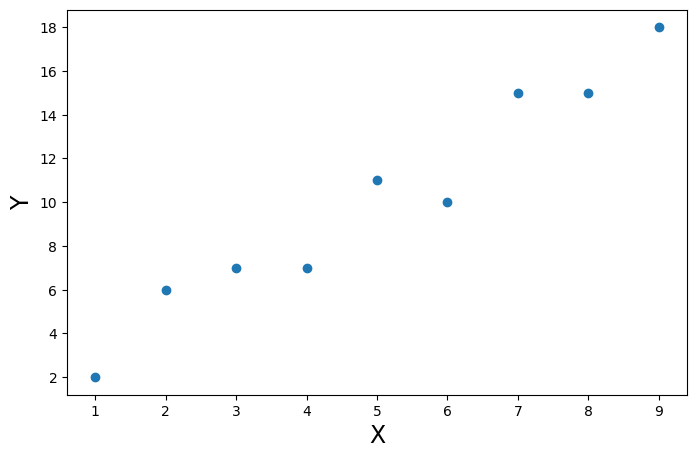

In [72]:
# having a first look at the data with a scatterplot
plt.figure(figsize = (8, 5))
plt.scatter(x, y)
plt.xlabel("X", fontsize = 17)
plt.ylabel("Y", fontsize = 17)
plt.show()

In [73]:
np.corrcoef(x,y) # correlation coefficient

array([[1.        , 0.97328619],
       [0.97328619, 1.        ]])

In [74]:
print(np.corrcoef(x,y)[0,1])

0.9732861925076797


In [75]:
np.polyfit(x = x, y = y, deg = 1) # linear regression between x and y

array([1.83333333, 0.94444444])

In [76]:
x = sm.add_constant(x) # linear regression with statsmodels
# we've to add x as a parameter to get the intercept in addition to the slope coefficient
x # [intercept, slope-coefficient]

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [77]:
model = sm.OLS(y,x) # creating the regression model

In [78]:
model # linear model object

In [79]:
results = model.fit() # creating the linear regression line with fit()

In [80]:
results # linear regression results object

In [81]:
results.params # getting the regression params/=coefficient
# [intercept, slope-coefficient]

array([0.94444444, 1.83333333])

In [82]:
# calculating the regression line
pred = results.predict(x) # calculating the corresponding y-values by passing the x-values
pred # predicted y-values

array([ 2.77777778,  4.61111111,  6.44444444,  8.27777778, 10.11111111,
       11.94444444, 13.77777778, 15.61111111, 17.44444444])

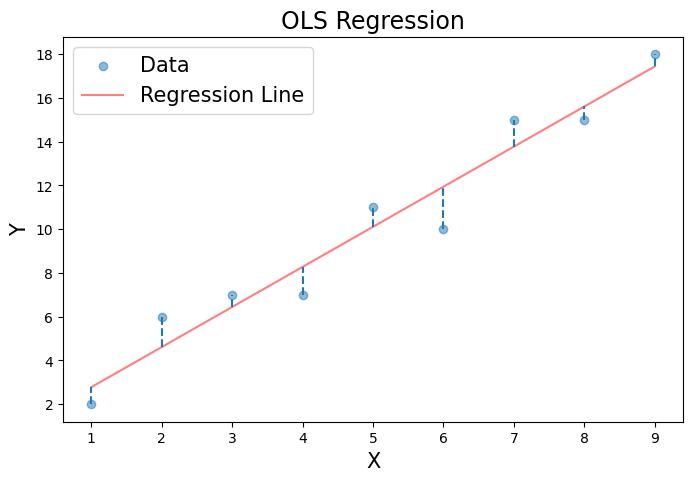

In [83]:
plt.figure(figsize = (8, 5))
# scatterplot: passing the second column of numpy-array as x 
plt.scatter(x = x[:,1], y = y, alpha = 0.5, label = "Data")
# plotting the regression line, x as above, y = pred (calculated obove)
plt.plot(x[:,1], pred, c = "r", alpha = 0.5, label = "Regression Line")
# creating the dotted lines (residuals) to the data points
for i in range(len(y)):
    plt.vlines(x[i,1], ymin = min(pred[i], y[i]), ymax = max(pred[i], y[i]), linestyles = "dashed")
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.title("OLS Regression", fontsize = 17)
plt.legend(fontsize = 15)
plt.show()

In [84]:
y # actual data/revenue

array([ 2,  6,  7,  7, 11, 10, 15, 15, 18])

In [85]:
pred # predicted data/revenue

array([ 2.77777778,  4.61111111,  6.44444444,  8.27777778, 10.11111111,
       11.94444444, 13.77777778, 15.61111111, 17.44444444])

In [86]:
# calculating the residuals/error terms
errors = y - pred # actual data minus predicted data
errors

array([-0.77777778,  1.38888889,  0.55555556, -1.27777778,  0.88888889,
       -1.94444444,  1.22222222, -0.61111111,  0.55555556])

In [87]:
results.resid # residuals/error terms with statsmodels attribute

array([-0.77777778,  1.38888889,  0.55555556, -1.27777778,  0.88888889,
       -1.94444444,  1.22222222, -0.61111111,  0.55555556])

In [88]:
sq_err = errors**2 # squared are more meaningful
sq_err

array([0.60493827, 1.92901235, 0.30864198, 1.63271605, 0.79012346,
       3.7808642 , 1.49382716, 0.37345679, 0.30864198])

In [89]:
sse = np.sum(sq_err) # sum over all squared errors
sse

np.float64(11.222222222222221)

In [90]:
results.ssr # sum over all squared errors with statsmodels

np.float64(11.222222222222221)

In [91]:
mse = sse / (9-2) # mean over all squared errors
# sum over all squared errors devided by number of observations minus number of independent variables minus one
# so it's actually devided by 9 - 1 - 1
mse

np.float64(1.603174603174603)

In [92]:
results.mse_resid # mean squared error minus statsmodel

np.float64(1.603174603174603)